In [1]:
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas

with open("../Data/courses.json", "r") as f:
    courses = json.load(f)

with open("../Data/professors.json", "r") as f:
    professors = json.load(f)

with open("../Data/classes.json", "r") as f:
    classes = json.load(f)

print(" Data Loaded Successfully")
print(f" Total Courses: {len(courses)}")
print(f" Total Professors: {len(professors)}")
print(f" Total Class: {len(classes)}")

 Data Loaded Successfully
 Total Courses: 20
 Total Professors: 10
 Total Class: 10


In [2]:
class GeneticAlgorithm:
    def __init__(self, courses, professors, classrooms, population_size=100, generations=300, mutation_rate=0.1):
        self.courses = courses
        self.professors = professors
        self.classrooms = classrooms
        self.population_size = population_size
        self.generations = generations
        self.mutation_rate = mutation_rate

    def initialize_population(self):
        population = []
        for _ in range(self.population_size):
            chromosome = []
            for course in self.courses:
                time = random.choice(course['allowed_times'])
                classroom = random.choice(self.classrooms)['code']
                chromosome.append({'course_code': course['code'], 'time': time, 'classroom': classroom})
            population.append(chromosome)
        return population

    def fitness(self, chromosome):
        score = 0
        used_slots = set()
        for gene in chromosome:
            slot = (gene['time'], gene['classroom'])
            if slot not in used_slots:
                used_slots.add(slot)
                score += 1
        return score

    def selection(self, population):
        population.sort(key=lambda x: self.fitness(x), reverse=True)
        return population[:self.population_size // 2]

    def crossover(self, parent1, parent2):
        point = random.randint(1, len(parent1) - 1)
        child = parent1[:point] + parent2[point:]
        return child

    def mutate(self, chromosome):
        for gene in chromosome:
            if random.random() < self.mutation_rate:
                gene['time'] = random.choice(
                    next(c for c in self.courses if c['code'] == gene['course_code'])['allowed_times'])
        return chromosome

    def run(self):
        population = self.initialize_population()
        for _ in range(self.generations):
            selected = self.selection(population)
            next_generation = []
            while len(next_generation) < self.population_size:
                parent1, parent2 = random.sample(selected, 2)
                child = self.crossover(parent1, parent2)
                child = self.mutate(child)
                next_generation.append(child)
            population = next_generation
        best_schedule = max(population, key=lambda x: self.fitness(x))
        return best_schedule

In [7]:
ga = GeneticAlgorithm(courses, professors, classes)
best_schedule = ga.run()

print(" Best Schedule Found:")
for gene in best_schedule:
    print(gene)


 Best Schedule Found:
{'course_code': 'CSE101', 'time': 'Monday 8-10', 'classroom': 'CL107'}
{'course_code': 'CSE102', 'time': 'Tuesday 12-14', 'classroom': 'CL104'}
{'course_code': 'CSE103', 'time': 'Monday 14-16', 'classroom': 'CL102'}
{'course_code': 'CSE104', 'time': 'Friday 10-12', 'classroom': 'CL109'}
{'course_code': 'CSE105', 'time': 'Thursday 8-10', 'classroom': 'CL102'}
{'course_code': 'CSE106', 'time': 'Monday 8-10', 'classroom': 'CL102'}
{'course_code': 'CSE107', 'time': 'Thursday 12-14', 'classroom': 'CL102'}
{'course_code': 'CSE108', 'time': 'Wednesday 14-16', 'classroom': 'CL101'}
{'course_code': 'CSE109', 'time': 'Thursday 10-12', 'classroom': 'CL106'}
{'course_code': 'CSE110', 'time': 'Friday 14-16', 'classroom': 'CL105'}
{'course_code': 'CSE111', 'time': 'Monday 16-18', 'classroom': 'CL105'}
{'course_code': 'CSE112', 'time': 'Friday 16-18', 'classroom': 'CL102'}
{'course_code': 'CSE113', 'time': 'Friday 12-14', 'classroom': 'CL105'}
{'course_code': 'CSE114', 'time': '

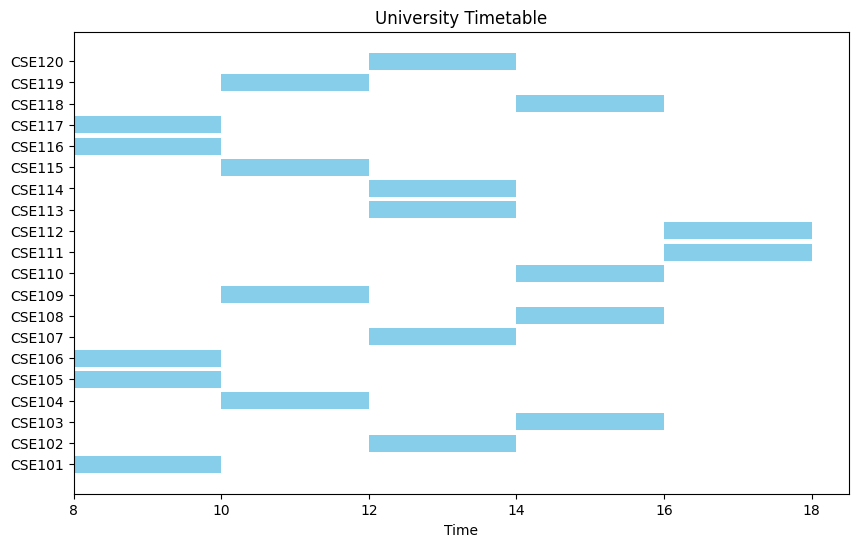

In [8]:
def plot_schedule(schedule):
    fig, ax = plt.subplots(figsize=(10, 6))
    y_labels = []
    y_pos = []
    for idx, gene in enumerate(schedule):
        ax.barh(idx, 2, left=int(gene['time'].split()[1].split('-')[0]), color='skyblue')
        y_labels.append(gene['course_code'])
        y_pos.append(idx)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Time')
    ax.set_title('University Timetable')
    plt.show()

plot_schedule(best_schedule)

In [ ]:
def export_to_pdf(schedule, filename="../outputs/timetable.pdf"):
    c = canvas.Canvas(filename)
    y = 800
    for gene in schedule:
        c.drawString(50, y, f"{gene['course_code']} at {gene['time']} in {gene['classroom']}")
        y -= 20
    c.save()
    print(f" PDF exported: {filename}")

export_to_pdf(best_schedule)